In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

file = "/Users/luisgranados/Documents/Kaggle/House Prices/train.csv"
house_explore = pd.read_csv(file)
house_descr = pd.read_table("/Users/luisgranados/Documents/Kaggle/House Prices/data_description.txt",
                            header=None, sep = '\t+',
                            engine='python',
                           skip_blank_lines = True)

In [2]:
house_explore.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Based on documentation for the datasets I will only drop the Misc feature. Most of the null values for the 
# other features are beacuse NA in the dataset means no or 0, not missing. 
house_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Fill in the null values with None
house_cat = house_explore.select_dtypes(exclude='number').fillna(value='None')

# Fill in null values with 0 except for LotFrontage! This feature will get imputed.
house_num = (house_explore
             .loc[:, house_explore.columns != 'LotFrontage']
             .select_dtypes(include='number')
             .fillna(value=0)
            )

house_explore_cleaned = (pd
                         .merge(house_cat, house_num, how='outer', left_index=True, right_index=True)
                         .drop(columns=['SalePrice'])
                        )

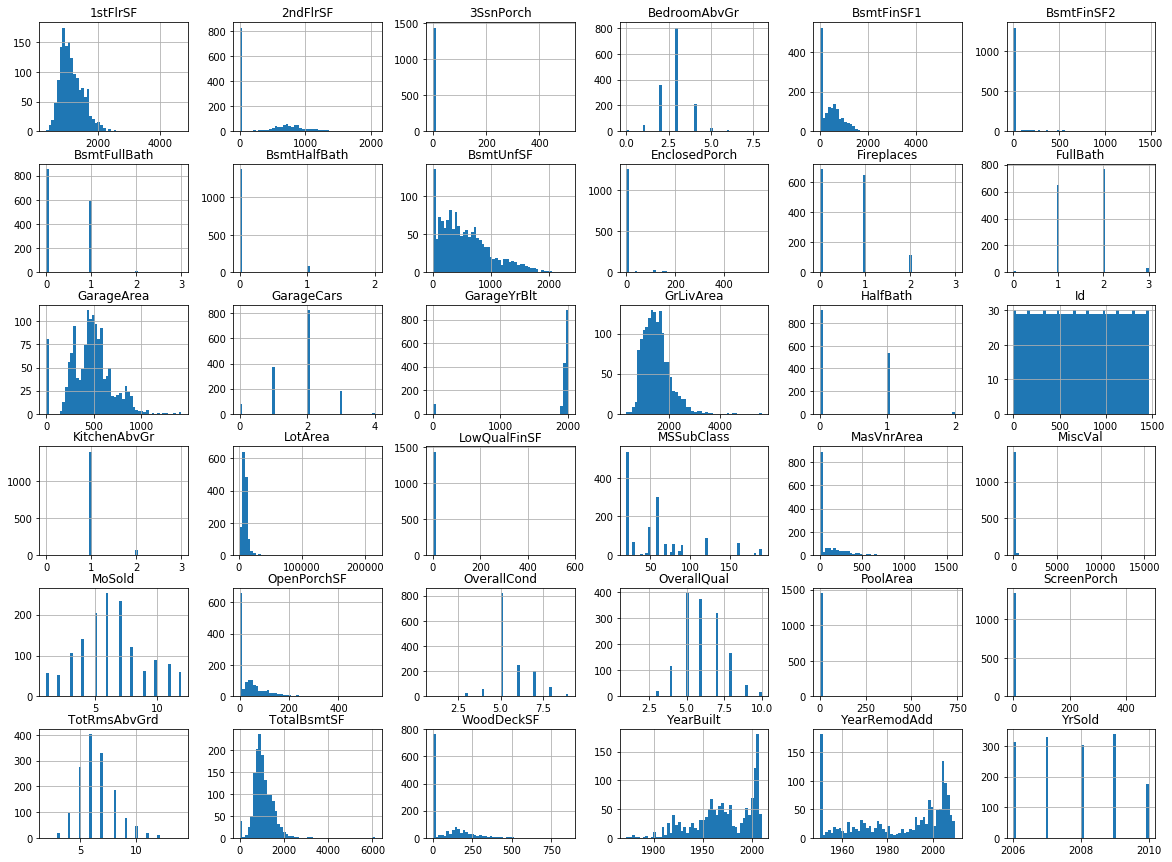

In [5]:
# Look to see if any scaling is required
house_explore_cleaned.hist(bins=50, figsize=(20,15));

In [6]:
# Look for any potential linear correlations
corr_matrix = house_explore.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
# Find any potential numerical features that have missing values
house_explore.select_dtypes(include='number').columns[house_explore.select_dtypes(include='number').isna().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [8]:
# Compute simple descriptive statistics of the target feature
house_explore['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
# Get the data ready for training 
housing_labels = house_explore['SalePrice'].copy()

housing_train_set = house_explore_cleaned.drop('MiscFeature', axis=1)

In [10]:
# Use this function for generating new ones. I can't generalize this part 
# because of all the potentially different ways to create each feature.
# but this will allow me to do the same generation for the test set.
def generator(dataframe):
        """Generate new features."""
        #dataframe['The new one'] = dataframe['original'] ** 2 

        return dataframe

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create the dataframe selector class for use in pipelines
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        #generator(X)
        return X[self.attribute_names].values
    
num_attribs = list(housing_train_set.select_dtypes(include='number').columns)
a = DataFrameSelector(num_attribs)
#a.attribute_names = num_attribs
a.fit(housing_train_set)
a.transform(housing_train_set)

array([[1.000e+00, 6.000e+01, 8.450e+03, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+00, 2.000e+01, 9.600e+03, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [3.000e+00, 6.000e+01, 1.125e+04, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [1.458e+03, 7.000e+01, 9.042e+03, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [1.459e+03, 2.000e+01, 9.717e+03, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [1.460e+03, 2.000e+01, 9.937e+03, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

In [12]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce


a = house_explore['ExterQual'].copy()
a = a.values.reshape(-1,1)
encoder = OrdinalEncoder()
X = a
#encoder.fit(X)
test = encoder.fit_transform(X)
#test = test.reshape(1,-1)
yo = pd.DataFrame(test, columns=['Test'], index=house_explore.index)
yo['original'] = house_explore['ExterQual']
yo.head()

,Test,original
0,2.0,Gd
1,3.0,TA
2,2.0,Gd
3,3.0,TA
4,2.0,Gd


In [13]:
# This works! keep messing with it to see if you can encode all the required features.
ordinal_cols_mapping = [{
    "col":"ExterQual",    
    "mapping": [
        ('Ex',5), 
        ('Gd',4), 
        ('TA',3), 
        ('Fa',2), 
        ('Po',1), 
        ('NA',0)
    ]},
]

encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, 
                         return_df = True)  
df_train = encoder.fit_transform(house_explore)
df_train.loc[:,'ExterQual'].head()

0    4
1    3
2    4
3    3
4    4
Name: ExterQual, dtype: int64